<a href="https://colab.research.google.com/github/Magnusrm/TDAT3025-Machine-Learning/blob/master/Task1.1/oppg_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install --upgrade tensorflow

In [0]:

import pandas as pd
import tensorflow as tf
import numpy as np


train_data = np.array(pd.read_csv("https://gitlab.com/ntnu-tdat3025/regression/childgrowth-datasets/raw/master/length_weight.csv")).transpose()

x_train = np.expand_dims(train_data[0], 1)
y_train = np.expand_dims(train_data[1], 1)

class LinearRegressionModel:
    def __init__(self):
        # Model input
        self.x = tf.placeholder(tf.float32)
        self.y = tf.placeholder(tf.float32)

        # Model variables
        self.W = tf.Variable([[0.0]])
        self.b = tf.Variable([[0.0]])

        # Predictor
        f = tf.matmul(self.x, self.W) + self.b

        # Mean Squared Error
        self.loss = tf.reduce_mean(tf.square(f - self.y))


model = LinearRegressionModel()

# Training: adjust the model so that its loss is minimized
minimize_operation = tf.train.GradientDescentOptimizer(0.00001).minimize(model.loss)

# Create session object for running TensorFlow operations
session = tf.Session()

# Initialize tf.Variable objects
session.run(tf.global_variables_initializer())

for epoch in range(1000):
    session.run(minimize_operation, {model.x: x_train, model.y: y_train})

# Evaluate training accuracy
W, b, loss = session.run([model.W, model.b, model.loss], {model.x: x_train, model.y: y_train})
print("W = %s, b = %s, loss = %s" % (W, b, loss))

session.close()


W = [[0.13666812]], b = [[-0.00767145]], loss = 4.9561467


loss: 4.9561465013459625


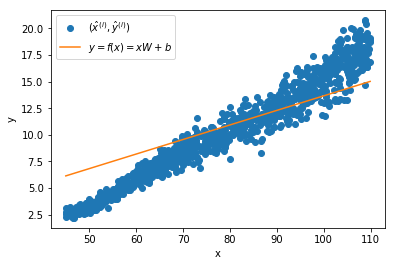

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots()

train_data = np.array(pd.read_csv("https://gitlab.com/ntnu-tdat3025/regression/childgrowth-datasets/raw/master/length_weight.csv")).transpose()

x_train = np.expand_dims(train_data[0], 1)
y_train = np.expand_dims(train_data[1], 1)

ax.plot(x_train, y_train, 'o', label='$(\\hat x^{(i)},\\hat y^{(i)})$')
ax.set_xlabel('x')
ax.set_ylabel('y')


class LinearRegressionModel:
    def __init__(self, W, b):
        self.W = W
        self.b = b

    # Predictor
    def f(self, x):
        return x * self.W + self.b

    # Mean Squared Error
    def loss(self, x, y):
        return np.mean(np.square(self.f(x) - y))


model = LinearRegressionModel(np.mat([[0.13666812]]), np.mat([[-0.00767145]]))

x = np.mat([[np.min(x_train)], [np.max(x_train)]])
ax.plot(x, model.f(x), label='$y = f(x) = xW+b$')

print('loss:', model.loss(x_train, y_train))

ax.legend()
plt.show()
